# Imports List

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Data Preperation

# "TIPS" Dataset

One waiter recorded information about each tip he received over a period of a few months working in one restaurant.

# Key Details

Tip in dollars

Bill in dollars

Sex of the bill payer

Whether there were smokers in the party

Day of the week

Time of day

Size of the party

In [3]:
tips_df=sns.load_dataset("tips")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips_df.describe() #numeric data

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Data Cleaning

In [7]:
tips_df.duplicated().sum()

1

In [8]:
tips_df.loc[tips_df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


# Data Exploration

# Speaker: Diana

In [19]:
sns.histplot(data= tips_df, x='tip')

<AxesSubplot:xlabel='Percent Tip', ylabel='Count'>

# Speaker: Ess

# Are there any differences in tipping beharior by Sex?

# Part I: Average of Tip Amount by Sex

Why a Bar? It allows me to get a quick look at the avegrage to determine if there is a huge difference in tipping between the two (2) sexes.

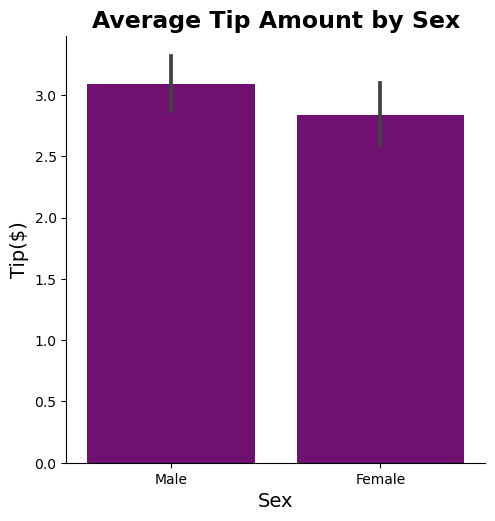

In [9]:
sns.catplot(x="sex", y="tip", data=tips_df, kind="bar",color='purple')

plt.xlabel('Sex',fontsize=14)
plt.ylabel('Tip($)', fontsize=14)
plt.title('Average Tip Amount by Sex', fontsize=17, fontweight='bold')

plt.show()

In [10]:
tips_df.groupby('sex')['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [48]:
Male_avg = 3.089618
Female_avg = 2.833448
diff_in_avg = Male_avg - Female_avg
diff_in_avg

0.25617

# Part II: Distribution of Tip Amount by Sex

Why a Swarmplot? It allows me to see the full range of the tips. The dataset isn't huge, so using a swamplot is OK in this case, and will help flag any patterns or outliers that may have impacted the average.

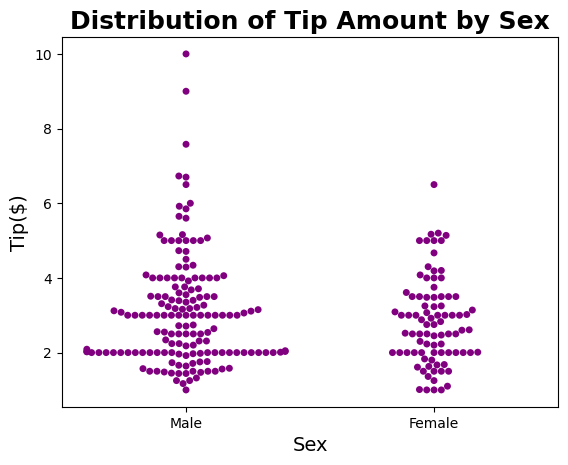

<Figure size 2000x1000 with 0 Axes>

In [11]:
sns.swarmplot(x="sex", y="tip", data=tips_df, color='purple', size=5)

plt.xlabel('Sex',fontsize=14)
plt.ylabel('Tip($)', fontsize=14)
plt.title('Distribution of Tip Amount by Sex', fontsize=18, fontweight='bold')

plt.show()

plt.figure(figsize=(20,10))

In [13]:
tip_count= tips_df['sex'].value_counts()
tip_count

Male      157
Female     87
Name: sex, dtype: int64

In [69]:
#Total Tips = 244
#As you can see, there 70 more Male tippers than Female tippers

How_Many_More_Male_Tippers_Are_There = 157-87
How_Many_More_Male_Tippers_Are_There

70

# It's important to note that this data does not infer that Male tippers tip more than Female tippers because of the Male vs Female variance. 

# Speaker: Mari

In [14]:
tips_df['Percent Tip'] = round((tips_df["tip"]/tips_df["total_bill"] *100),2)
tips_df

,total_bill,tip,sex,smoker,day,time,size,Percent Tip
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.39
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.36
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.82
242,17.82,1.75,Male,No,Sat,Dinner,2,9.82


In [20]:
sns.histplot(data = tips_df, x= 'Percent Tip', kde = 'true')

<AxesSubplot:xlabel='Percent Tip', ylabel='Count'>

In [22]:
sns.histplot(data = tips_df, x = 'Percent Tip', kde = 'true', hue = 'sex', palette = ["black", "red"])

<AxesSubplot:xlabel='Percent Tip', ylabel='Count'>